# Name : Adwaiy Singh
# Reg. No. : 220968424
# Sec. : A
# Batch : 2

# Week 8

## MDP & DYNAMIC PROGRAMMING
### Use the Frozen Lake environment.
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
 
### Learn the optimal policy for the frozen lake environment using the Policy Iteration vs the Value Iteration technique.
 
#### a. Create a Policy Iteration function with the following parameters
    ⮚Policy: 2D array of a size n(S) x n(A), each cell represents a probability of taking action ain state s.
    ⮚Environment: Initialized OpenAI gym environment object
    ⮚Discount_factor: MDP discount factor
    ⮚theta: A threshold of a value function. Change once the update to value function is below this number
    ⮚max_iterations: Maximum number of iterations b
 
#### b. Create a Value Iteration function with the following parameters
    ⮚environment: Initialized OpenAI gym environment object
    ⮚ discount_factor: MDP discount factor
    ⮚theta: A threshold of a value function. Change once the update to value function is below this number
    ⮚ max_iterations: Maximum number of iterations

#### c.  Compare the number of wins, and average return after 1000 episodes and comment on which method performed                   better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv, generate_random_map

In [2]:
def policy_iteration(policy, env, discount_factor=0.99, theta=1e-8, max_iterations=1000):
    if hasattr(env, 'unwrapped'):
        env = env.unwrapped
    
    nS = env.observation_space.n
    nA = env.action_space.n
    V = np.zeros(nS)
    
    for i in range(max_iterations):
        while True:
            delta = 0
            for s in range(nS):
                v_old = V[s]
                v_new = 0
                for a, action_prob in enumerate(policy[s]):
                    for prob, next_state, reward, done in env.P[s][a]:
                        v_new += action_prob * prob * (reward + discount_factor * V[next_state])
                V[s] = v_new
                delta = max(delta, abs(v_old - v_new))
            if delta < theta:
                break

        policy_stable = True
        for s in range(nS):
            old_action = np.argmax(policy[s])
            action_values = np.zeros(nA)
            for a in range(nA):
                for prob, next_state, reward, done in env.P[s][a]:
                    action_values[a] += prob * (reward + discount_factor * V[next_state])
            best_action = np.argmax(action_values)
            new_policy = np.eye(nA)[best_action]
            if not np.array_equal(new_policy, policy[s]):
                policy_stable = False
            policy[s] = new_policy
        
        if policy_stable:
            break

    return V, policy

In [3]:
def value_iteration(env, discount_factor=0.99, theta=1e-8, max_iterations=1000):
    if hasattr(env, 'unwrapped'):
        env = env.unwrapped
        
    nS = env.observation_space.n
    nA = env.action_space.n
    V = np.zeros(nS)

    for i in range(max_iterations):
        delta = 0
        for s in range(nS):
            v_old = V[s]
            action_values = np.zeros(nA)
            for a in range(nA):
                for prob, next_state, reward, done in env.P[s][a]:
                    action_values[a] += prob * (reward + discount_factor * V[next_state])
            V[s] = np.max(action_values)
            delta = max(delta, abs(v_old - V[s]))
        if delta < theta:
            break

    policy = np.zeros((nS, nA))
    for s in range(nS):
        action_values = np.zeros(nA)
        for a in range(nA):
            for prob, next_state, reward, done in env.P[s][a]:
                action_values[a] += prob * (reward + discount_factor * V[next_state])
        best_action = np.argmax(action_values)
        policy[s] = np.eye(nA)[best_action]

    return V, policy

In [4]:
def evaluate_policy(env, policy, num_episodes=1000):
    wins = 0
    total_return = 0
    
    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = truncated = False
        episode_return = 0
        while not (terminated or truncated):
            action = np.random.choice(np.arange(env.action_space.n), p=policy[state])
            state, reward, terminated, truncated, _ = env.step(action)
            episode_return += reward
        if reward > 0:
            wins += 1
        total_return += episode_return
        
    return wins, total_return / num_episodes

In [5]:
def evaluate_policy_graph(env, policy, num_episodes=1000, eval_interval=100):
    wins = 0
    total_return = 0
    win_history = []
    return_history = []

    for i in range(num_episodes):
        state, _ = env.reset()
        terminated = truncated = False
        episode_return = 0
        while not (terminated or truncated):
            action = np.random.choice(np.arange(env.action_space.n), p=policy[state])
            state, reward, terminated, truncated, _ = env.step(action)
            episode_return += reward
        
        if reward > 0:
            wins += 1
        total_return += episode_return
        
        if (i + 1) % eval_interval == 0:
            avg_return = total_return / (i + 1)
            win_history.append(wins)
            return_history.append(avg_return)

    return win_history, return_history

In [6]:
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=True)

nS = env.observation_space.n
nA = env.action_space.n

initial_policy = np.ones((nS, nA)) / nA
discount_factor = 0.99
theta = 1e-8
max_iterations = 1000

In [7]:
V_policy, policy_policy = policy_iteration(initial_policy.copy(), env, discount_factor, theta, max_iterations)
wins_policy, avg_return_policy = evaluate_policy(env, policy_policy, num_episodes=1000)

print("Policy Iteration:")
print("Wins: {} out of 1000 episodes".format(wins_policy))
print("Average Return: {:.3f}".format(avg_return_policy))

Policy Iteration:
Wins: 639 out of 1000 episodes
Average Return: 0.639


In [8]:
V_value, policy_value = value_iteration(env, discount_factor, theta, max_iterations)
wins_value, avg_return_value = evaluate_policy(env, policy_value, num_episodes=1000)

print("Value Iteration:")
print("Wins: {} out of 1000 episodes".format(wins_value))
print("Average Return: {:.3f}".format(avg_return_value))

Value Iteration:
Wins: 668 out of 1000 episodes
Average Return: 0.668


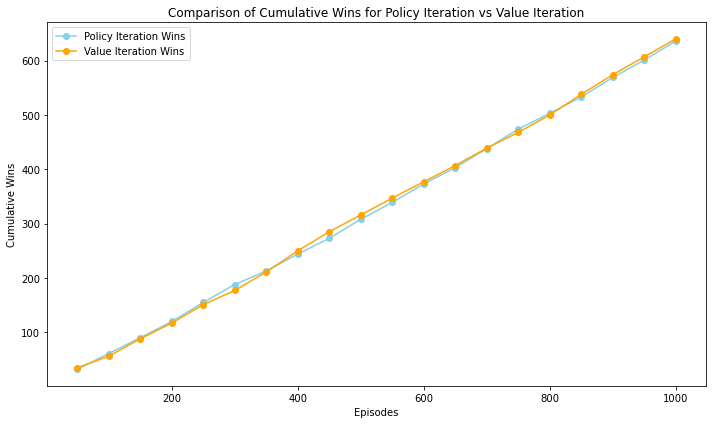

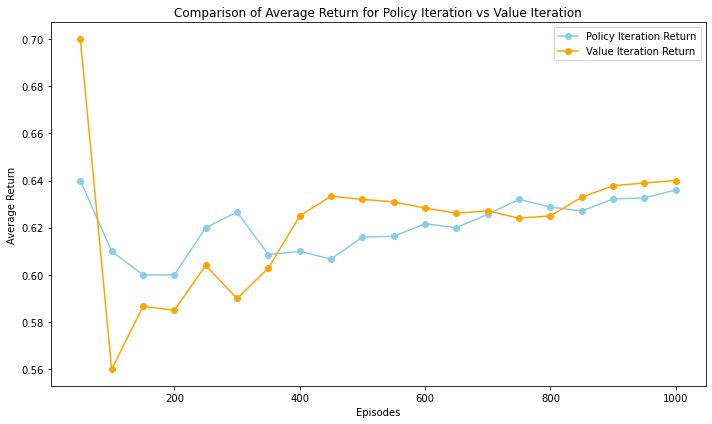

In [9]:
num_episodes = 1000
eval_interval = 50

win_history_policy, return_history_policy = evaluate_policy_graph(env, policy_policy, num_episodes, eval_interval)

win_history_value, return_history_value = evaluate_policy_graph(env, policy_value, num_episodes, eval_interval)

# Plotting the cumulative wins comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative wins
ax1.plot(np.arange(eval_interval, num_episodes + 1, eval_interval), win_history_policy, color='skyblue', label='Policy Iteration Wins', marker='o', linestyle='-', markersize=6)
ax1.plot(np.arange(eval_interval, num_episodes + 1, eval_interval), win_history_value, color='orange', label='Value Iteration Wins', marker='o', linestyle='-', markersize=6)

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Wins', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Comparison of Cumulative Wins for Policy Iteration vs Value Iteration')
ax1.legend()

# Show wins plot
plt.tight_layout()
plt.show()

# Plotting the average return comparison
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot average return
ax2.plot(np.arange(eval_interval, num_episodes + 1, eval_interval), return_history_policy, color='skyblue', label='Policy Iteration Return', marker='o', linestyle='-', markersize=6)
ax2.plot(np.arange(eval_interval, num_episodes + 1, eval_interval), return_history_value, color='orange', label='Value Iteration Return', marker='o', linestyle='-', markersize=6)

ax2.set_xlabel('Episodes')
ax2.set_ylabel('Average Return', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_title('Comparison of Average Return for Policy Iteration vs Value Iteration')
ax2.legend()

# Show return plot
plt.tight_layout()
plt.show()

In [10]:
env.close()

In the comparison between Policy Iteration and Value Iteration on the Frozen Lake environment, **Value Iteration slightly outperforms Policy Iteration**, achieving 668 wins with an average return of 0.668, compared to Policy Iteration’s 639 wins and an average return of 0.639. 

The key reason for this is that Value Iteration directly **updates the value function and converges more quickly**, making it more efficient in smaller, stochastic environments like Frozen Lake. While Policy Iteration can be more stable and systematic, it can be slower due to the alternating steps of policy evaluation and improvement. 

Thus, in this case, Value Iteration demonstrates better performance by more **effectively selecting optimal actions** and converging to an optimal policy.